# 🍷 Predicting Wine Quality based on Chemical Composition

## CMSC 320 · Fall 2025 Data Science Project



## 1. Contributions

| Member            | Sections | Summary |
|------------------|----------|------------------------|
| Alex Shrestha    | C, F, G | Added descriptive statistics, correlation/covariation, visualizations for ML, final formatting of doc |
| Rahul Arora      | A, B, C | Proposed initial idea, wrote our description of data curation and data exploration strategies |
| Ashim Thakuri    | C, D, E, F | Implemented hypothesis testing, data for regression models and random forest, added plots for random forest |
| Andrew Foulk     | E, F, G | Wrote analysis and conclusion for initial data exploration and for each section of the models |



## 2. Introduction

While many consumers simply choose a bottle of wine based on the name, location, vibes and price tag of a bottle, the true quality of wine is based on key measurable chemical features that make each bottle unique. This project aims to better explain how many of these chemical attributes can affect the overall quality of wine. With many bottles costing hundreds to potentially thousands of dollars, having a basic understanding of how all the ingredients play together is critical in choosing the right bottle.

Our investigation focuses on several key questions that will help in overall understanding: What chemical features of the wine most strongly correlates with the wine quality? What combinations of attributes typically lead to the highest quality wines? Additionally, our results will present a few optimal combinations of chemical characteristics that the dataset consistently links to high quality wine. From all of the analysis, we aim to have a predictive model that will help users over 21 truly determine the quality of bottles of wine.

## 3. Data Curation

For this project, we use the Wine Quality Dataset, which contains real world analysis of different wines. Each of the different wines all comes from the same region in northern Portugal. Each wine is labeled and categorized based on a variety of factors that include: fixed acidity, citric acid, density, pH levels, alcohol, among other things. These factors help determine the output which is a quality score that scores the wines between 0-10.

The dataset was compiled by by Mr. M Yasser H who is an AI&ML Engineer from India and who created this dataset for it to be accessible to others on Kaggle, an online community for data scientists and machine learning professionals to learn and work with various datasets. However the dataset’s entries in large part originate from the original “Wine Quality” dataset, which was donated by the UCI Machine Learning Repository in October, 2009. This was created as part of research by Paulo Cortez et al..

Dataset citation:
> M. Yasser H. (2022). *Wine Quality Dataset* [Data set]. Kaggle. https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

We imported the dataset into a pandas DataFrame, checked data types, normalized acidity variables, created a **total acidity** feature, and verified that the dataset contained no missing values requiring imputation. This structured DataFrame served as the foundation for all later visualizations, hypothesis tests, and predictive modeling.


In [143]:
# Importing Packages

import pandas as pd
import kagglehub
import os
from kagglehub import KaggleDatasetAdapter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from scipy.stats import ttest_ind

In [144]:
# Getting datasets

path = kagglehub.dataset_download("yasserh/wine-quality-dataset")

for file in os.listdir(path):
    if file.endswith(".csv"):
        dataset_path = os.path.join(path, file)
        break
df = pd.read_csv(dataset_path)

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'wine-quality-dataset' dataset.
Path to dataset files: /kaggle/input/wine-quality-dataset


In [145]:
# Normalizing all acid columns to get total acid average

scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[['fixed acidity', 'volatile acidity', 'citric acid']] = scaler.fit_transform(df[['fixed acidity', 'volatile acidity', 'citric acid']])
df_scaled['average_acid'] = df_scaled[['fixed acidity', 'volatile acidity', 'citric acid']].mean(axis=1)
df_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,average_acid
0,0.247788,0.397260,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0.215016
1,0.283186,0.520548,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0.267911
2,0.283186,0.438356,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2,0.253847
3,0.584071,0.109589,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3,0.417887
4,0.247788,0.397260,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4,0.215016


## 4. Exploratory Data Analysis

We conduct 3 different statistical methods to get basic understanding of the dataset, each giving us critical information to help guide the project.


### **Descriptive Statistics**

We began with descriptive statistics to understand the structure of the data. This includes seeing what the entries look like, the number of entries, columns, data types summary statistics. We used commands head(), info(), shape, describe() and columns to summarize the data and verify the data was properly loaded in.

In [146]:
df_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,average_acid
0,0.247788,0.397260,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0.215016
1,0.283186,0.520548,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0.267911
2,0.283186,0.438356,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2,0.253847
3,0.584071,0.109589,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3,0.417887
4,0.247788,0.397260,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4,0.215016


In [147]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
 13  average_acid          1143 non-null   float64
dtypes: float64(12), int64(2)
memory usage: 125.1 KB


In [148]:
print("Rows:", df_scaled.shape[0]) # rows
print("Cols:", df_scaled.shape[1]) # cols

Rows: 1143
Cols: 14


In [149]:
df_scaled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,average_acid
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,0.328417,0.281739,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379,0.292840
std,0.154654,0.123036,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116,0.095925
min,0.000000,0.000000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000,0.067927
25%,0.221239,0.186644,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000,0.220153
50%,0.292035,0.273973,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000,0.280386
75%,0.398230,0.356164,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000,0.347205
max,1.000000,1.000000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000,0.706813


In [150]:
df_scaled.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id', 'average_acid'],
      dtype='object')

### **Correlation & Covariation**

We analyze the correlations and covariation to understand how the alcohol content closelt related to the overall wine quality. This helps identify strong positive or negative relationships and highlight it's importance along with other features.

Correlation between alcohol and quality is 0.4848662118085116
Covariation between alcohol and quality is 0.42283216860005757



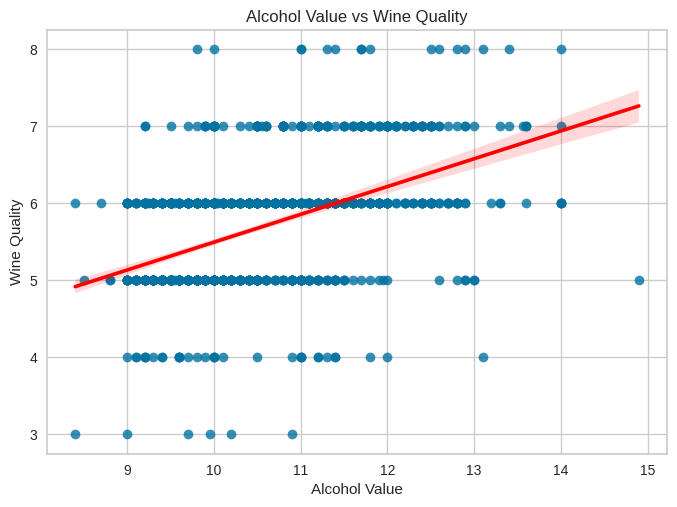

In [151]:
corr = df_scaled['alcohol'].corr(df_scaled['quality'])
cov = df_scaled['alcohol'].cov(df_scaled['quality'])
print(f"Correlation between alcohol and quality is {corr}")
print(f"Covariation between alcohol and quality is {cov}")
print()

sns.regplot(x='alcohol', y='quality', data=df_scaled, line_kws={'color': 'red'})
plt.title("Alcohol Value vs Wine Quality")
plt.xlabel("Alcohol Value")
plt.ylabel("Wine Quality")
plt.show()

### Analysis of Above

The Pearson correlation between alcohol and quality is approximately 0.48, and the covariance is about 0.42. The positive sign and moderate magnitude of the correlation indicate that on average wines with higher alcohol content tend to receive higher quality ratings, but alcohol alone does not fully determine quality.

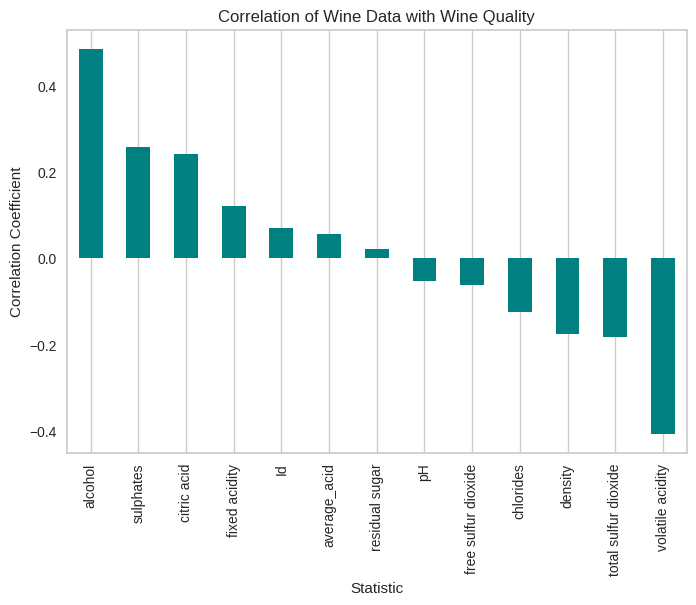

In [152]:
total_corr = df_scaled.corr()['quality'].sort_values(ascending=False)
total_corr.drop('quality').plot(kind='bar', color='teal')
plt.title('Correlation of Wine Data with Wine Quality')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Statistic')
plt.grid(axis='y')
plt.show()

### Analysis of Above

Here we look at how all the measured features relate to wine quality. The bar chart displays the correlation coefficient between each standardized feature and the quality. Features with positive correlations are associated with higher quality scores as they increase, whereas those with negative correlations tend to be higher in lower-quality wines.

From this plot, we see that a small subset of variables stands out as especially informative. Alcohol has one of the strongest positive correlations with quality, reinforcing the earlier result from the bivariate scatterplot. Other features such as sulphates and citric acid, also show positive associations, suggesting that these chemical properties contribute to what tasters perceive as higher-quality wine. On the other hand, variables like volatile acidity and total sulfur dioxide are negatively correlated with quality, indicating that higher levels of these components are more common in lower-rated wines.


### **HYPOTHESIS TESTING**

We next investigate whether total acidity is statistically associated with wine quality.

H0: There is no difference in acid content in higher quality wines compared to the acid content in lower quality wines.

HA: There is a signficant difference in acid content in higher quality wines compared to the acid content in lower quality wines.

### ***T-Test***

In [153]:
length = df.shape[0]
better = df_scaled[df_scaled['quality'] >= 7]['average_acid']
worse = df_scaled[df_scaled['quality'] <= 5]['average_acid']

t_stat, p_value = ttest_ind(better, worse, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < 0.05:
  print("Reject the null hypothesis \nAcid levels do differ in diff wine qualities")
else:
  print("Fail to reject the null hypothesis \nAcid levels don't differ in wine qualities")

T-statistic: 2.777796854498113
P-value: 0.005940515429995205
Reject the null hypothesis 
Acid levels do differ in diff wine qualities


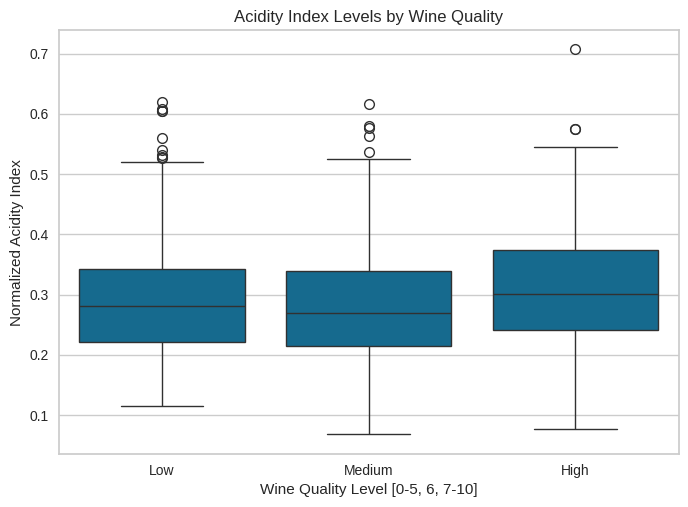

In [154]:
sns.boxplot(x=pd.cut(df_scaled['quality'], bins=[0,5,6,10], labels=['Low','Medium','High']), y='average_acid', data=df_scaled)
plt.title("Acidity Index Levels by Wine Quality")
plt.xlabel("Wine Quality Level [0-5, 6, 7-10]")
plt.ylabel("Normalized Acidity Index")
plt.show()

### Analysis of Above

The t-test shows a statistically signficant difference between high quality and low quality wines as we reject the null hypothesis. The boxplot looks similar across them all, but although the medians only slightly differ, the overall range is different. The difference is big enough to create a statistical significance.

Additionally, we can see the outliers really easily on the boxplots. Some of the data points are easily greater than Q3 + 1.5 IQR, meaning these data points fall significantly outside of the main distribution.

### ***Chi-Squared Test***

Contingency Table: quality_level  Low  Medium  High
acid_level                      
Low            260     254    61
Medium         245     191    84
High            17      17    14
Chi-square statistic: 19.840289726067923
P-value: 0.000536987561342316
Reject null hypothesis


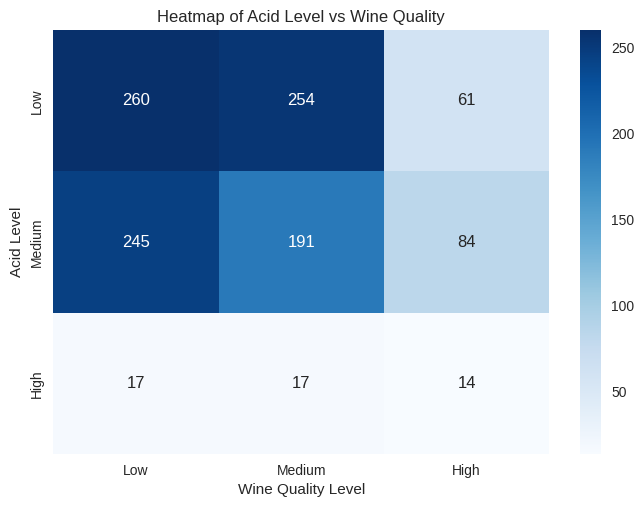

In [155]:
from scipy.stats import chi2_contingency

df_scaled['acid_level'] = pd.cut(df_scaled['average_acid'], bins=3, labels=['Low','Medium','High'])
df_scaled['quality_level'] = pd.cut(df_scaled['quality'], bins=[0,5,6,10], labels=['Low','Medium','High'])

contingency_table = pd.crosstab(df_scaled['acid_level'], df_scaled['quality_level'])
print("Contingency Table:", contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p)

if p < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d')
plt.title("Heatmap of Acid Level vs Wine Quality")
plt.ylabel("Acid Level")
plt.xlabel("Wine Quality Level")
plt.show()


### Analysis of Above

The Chi-Squared test is used to determine if there is a significant association between two categorical variables. In this case, we are examining the relationship between 'acid_level' and 'quality_level'.
Reject null hypothesis: Since the p-value (0.0005) is less than the significance level (commonly 0.05), we reject the null hypothesis. This suggests there is a statistically significant association between acid level and wine quality level. The heatmap visually represents the contigency table.

## 5. & 6. Primary Analysis & Visualizations

We conduct a linear regression and random forest model to better help the answer the questions from the introduction.


### Setting up the Models

This part involves importing all necessary packages and splitting the data to train/test portions to use in the ML models.  

In [156]:
# Imports

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix


In [157]:
# Helpers
test_size = 0.2
random_state=42

def split_data(X, Y, test_size=test_size):
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y,
        test_size=test_size,
        random_state=random_state,
        shuffle=True
    )
    return X_train, X_test, Y_train, Y_test

In [158]:
# Splitting the dataset

X, Y = df_scaled.drop(columns=["quality", "fixed acidity", "volatile acidity", "citric acid", "Id", "acid_level", "quality_level"]), df_scaled["quality"]
X_train, X_test, Y_train, Y_test = split_data(X, Y)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (914, 9)
X_test shape: (229, 9)
Y_train shape: (914,)
Y_test shape: (229,)


### **Linear Regression**

Here, we use a linear regression model to effectively understand how all the chemical features relate to wine quality. This helps us understand the overall effet from all of the features by assuming linear relationships with all features.


In [159]:
# Creating the target column

target_col = "quality"

In [160]:
linreg = LinearRegression()
linreg.fit(X_train, Y_train)

LinearRegression()

In [161]:
Y_pred_lin = linreg.predict(X_test)

print("=== Linear Regression ===")
print("MSE :", mean_squared_error(Y_test, Y_pred_lin))
print("R²  :", r2_score(Y_test, Y_pred_lin))
print("Coefficients:", linreg.coef_)
print("Intercept   :", linreg.intercept_)

=== Linear Regression ===
MSE : 0.37576220588234455
R²  : 0.3247431348544987
Coefficients: [-2.27088835e-02 -2.88670307e+00  4.90395715e-03 -3.40997614e-03
  2.33611206e+01 -1.10146197e+00  1.27593879e+00  3.51369765e-01
 -9.18732918e-01]
Intercept   : -17.82837425723413


### Linear Regression Analysis

The baseline multiple linear regression model achieves:

- MSE ≈ 0.376  
- R² ≈ 0.325

An R² of about 0.32 means the linear model explains roughly 32% of the variance in quality scores on the test set. This indicates that a purely linear relationship between the input features and quality captures some, but not most, of the structure in the data.


### Linear Regression Visualization

The scatter plot below shows how the Linear Regression model predicted the wine quality vs the actual values. The model captures some general trends as many predictions cluster around the middle, however it doesn't fully represent the nonlinear relationships in the data perfecetly.


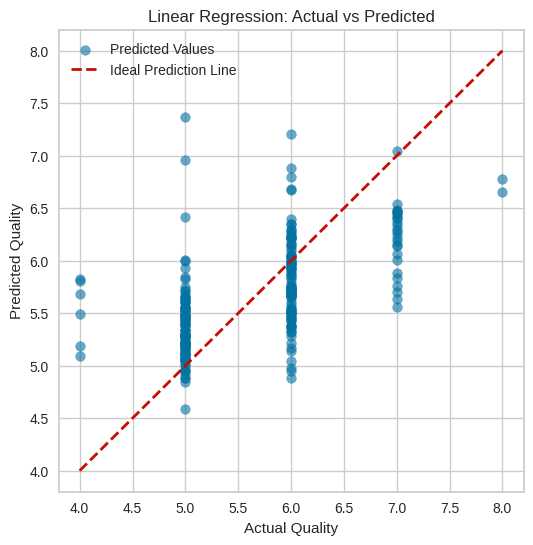

In [162]:
plt.figure(figsize=(6,6))
plt.scatter(Y_test, Y_pred_lin, alpha=0.6, label="Predicted Values")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2, label="Ideal Prediction Line")

plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.show()


## **Random Forest**

To model the more complex relationships, we use a random forest model. This should better capture the nonlinear relationships and feature interactions having multiple decision trees combined.

In [163]:
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=random_state,
    n_jobs=-1
)

rf.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42)

In [164]:
Y_pred_rf = rf.predict(X_test)

print("\n=== Random Forest Regressor ===")
print("MSE :", mean_squared_error(Y_test, Y_pred_rf))
print("R²  :", r2_score(Y_test, Y_pred_rf))


=== Random Forest Regressor ===
MSE : 0.2892600194080543
R²  : 0.48019036811124094


### Random Forest Analysis

- MSE ≈ 0.289
- R² ≈ 0.480

The Random Forest substantially improves performance, raising R² to about 0.48 (nearly half of the variance explained) and reducing MSE compared to linear regression. This suggests that non-linear relationships and feature interactions, which Random Forests can capture but linear models cannot are important for modeling wine quality.

At the same time, an R² below 0.5 also tells us that a large portion of the variability in quality is still unexplained by the measured chemical properties alone. Factors such as tasting panel subjectivity, vineyard practices, grape variety, and other unmeasured attributes likely play a significant role in how wines are ultimately rated.

### Random Forest Visualization

The plot below shows how the model's predictions differ from the actual wine qualities. The model predicts qualities more closely compared to linear regression and has more tight clusters around the center, but still not completely ideal.

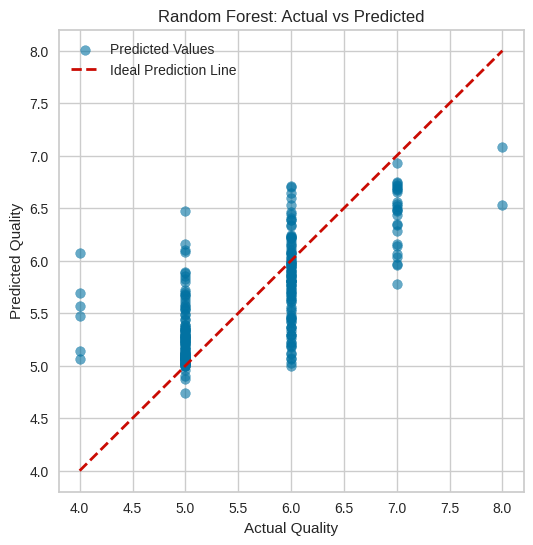

In [165]:
plt.figure(figsize=(6,6))
plt.scatter(Y_test, Y_pred_rf, alpha=0.6, label="Predicted Values")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2, label="Ideal Prediction Line")

plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Random Forest: Actual vs Predicted")
plt.legend()
plt.show()


### Random Forest Feature Importance

Now, we conduct feature importance to see how strongly each chemical compound plays in the overall quality. The bar chart visualizes the importances where each bar represents a feature and its length indicates how much that feature contributed to the model's predictions. Features with higher importance values are considered more influential by the model in determining wine quality.

In [166]:
importances = rf.feature_importances_
for name, imp in sorted(zip(X_train.columns.to_numpy(), importances), key=lambda x: -x[1]):
    print(f"{name:20s} -> {imp:.3f}")

alcohol              -> 0.297
sulphates            -> 0.177
total sulfur dioxide -> 0.093
pH                   -> 0.091
chlorides            -> 0.080
average_acid         -> 0.074
density              -> 0.069
residual sugar       -> 0.061
free sulfur dioxide  -> 0.058


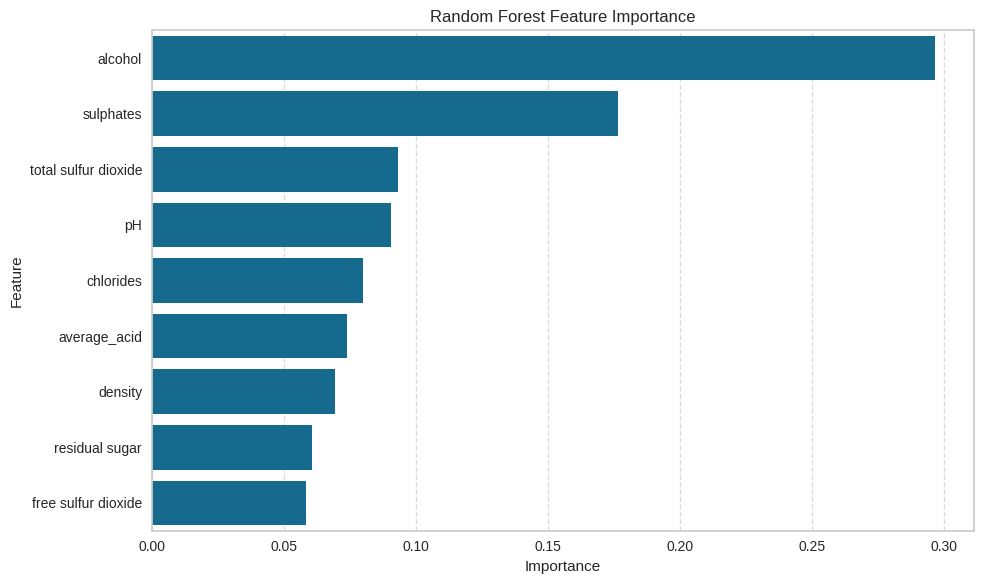

In [167]:
importances = rf.feature_importances_
features = X_train.columns

# Create a DataFrame for better sorting and plotting
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Random Forest - Treating Quality as a Classification

Now we are treating the quality column as a classification like an integer class instead of a continuous scale like a regression model. This is to see if there are any more clear distinctions and clearer patterns in how the chemicals affect quality.


In [168]:
clf = RandomForestClassifier(
    n_estimators=300,
    random_state=random_state,
    class_weight="balanced"  # because some qualities are rarer
)

clf.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

In [169]:
Y_pred_cls = clf.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred_cls))

Accuracy: 0.6812227074235808


### Analysis of Above

Since the accuracy for the classification was somewhat low at only .68, we are dividing the quality into more classes so that the patterns can be seen more clearly. The bins will go from 0-4, 5-6, 7-10 to have low, medium and high qualities.

In [170]:
def bin_quality(y):
    y = np.array(y)
    y_binned = np.empty_like(y)

    y_binned[y <= 4] = 0                # low
    y_binned[(y == 5) | (y == 6)] = 1   # medium
    y_binned[y >= 7] = 2                # high
    return y_binned

Y_train_bin = bin_quality(Y_train)
Y_test_bin = bin_quality(Y_test)

In [171]:
clf_bin = RandomForestClassifier(
    n_estimators=300,
    random_state=random_state,
    class_weight="balanced"
)

clf_bin.fit(X_train, Y_train_bin)

RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

In [172]:
Y_pred_bin = clf_bin.predict(X_test)

print("Accuracy:", accuracy_score(Y_test_bin, Y_pred_bin))

Accuracy: 0.8951965065502183


### Random Forest Classification Visualization

The matrix below shows how well the classifier can fully distinguish between low, medium and high quality wines from the given chemical compounds. However most wines fall into the medium quality range, so the model is able to predict that pattern frequently.

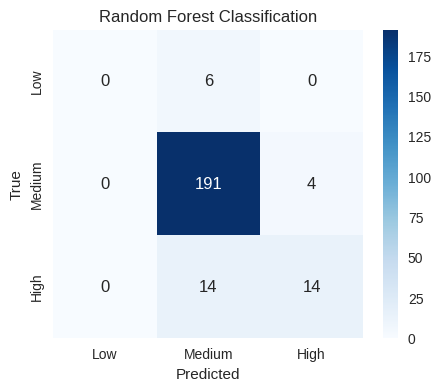

In [173]:
cm = confusion_matrix(Y_test_bin, Y_pred_bin)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Classification")
plt.show()


## 7. Insights & Conclusion

This project provides a comprehensive look at how chemical properties influence wine quality and how well we can model that relationship using machine learning. Exploratory analysis highlighted several key features: alcohol, sulphates, and citric acid consistently showed positive relationships with higher quality, while volatile acidity, density, and sulfur dioxide levels tended to depress quality scores. Statistical testing confirmed that acidity levels are linked to quality, supporting the idea that balanced acidity is a positive contributor to wine perception.

Our predictive modeling provides deeper insight. Linear regression captures about 32% of the variance in quality (R² ≈ 0.324), demonstrating that simple linear relationships alone cannot fully explain wine ratings. Random forest regression performs substantially better (R² ≈ 0.48), indicating that nonlinear interactions among acidity, alcohol content, sulfur compounds, and density are crucial for understanding quality. The feature importance ranking identifies alcohol as the top predictor, followed by sulphates and total sulfur dioxide, which aligns well with the patterns observed in exploration.

We also explored classification as an alternative framing of the problem. A random forest classifier achieved about 68% accuracy when predicting the full set of discrete quality scores. After grouping wines into broader categories (low, medium, high), accuracy increased dramatically to ~89%, suggesting that while predicting exact quality scores is difficult, predicting quality tiers is much more feasible.

Overall, the project demonstrates that wine quality is influenced by a combination of chemical factors, with no single variable dominating on its own. Machine learning models capture a meaningful portion of these relationships, but not all of them, reflecting the complexity and subjectivity of human wine evaluation.

